In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default')

## `Problem 1 to 5`:

Dataset link: https://tinyurl.com/2fe6vz4u

**Add a label to every axis and add a proper title for the charts. Also add proper labels if there are multiple representations.** Then, you can customize it as your wish.

### **`Problem-1:`** Draw a line plot of which, the x-axis is the "Year" and the y-axis is sum of "PM2.5" of two countries Iran and China. 

In [2]:
df = pd.read_csv('https://tinyurl.com/2fe6vz4u')
df.head()

,Unnamed: 0,Position,Country,City/Town,Year,PM2.5,Temporal coverage,PM10,Temporal coverage.1,Database version (year)
0,0,1,India,Kanpur,2016,173,>75%,319,NaN,2018
1,1,2,India,Faridabad,2016,172,>75%,316,NaN,2018
2,2,3,India,Gaya,2016,149,50% -< 75%,275,NaN,2018
3,3,4,India,Varanasi,2016,146,>75%,260,NaN,2018
4,4,5,India,Patna,2016,144,>75%,266,NaN,2018


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               500 non-null    int64 
 1   Position                 500 non-null    int64 
 2   Country                  500 non-null    object
 3   City/Town                500 non-null    object
 4   Year                     500 non-null    int64 
 5   PM2.5                    500 non-null    int64 
 6   Temporal coverage        86 non-null     object
 7   PM10                     500 non-null    int64 
 8   Temporal coverage.1      52 non-null     object
 9   Database version (year)  500 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 39.2+ KB


In [4]:
df.size

5000

In [5]:
iran_series=df.query('Country=="Iran"').groupby('Year')['PM2.5'].sum()
china_series=df.query('Country=="China"').groupby('Year')['PM2.5'].sum()

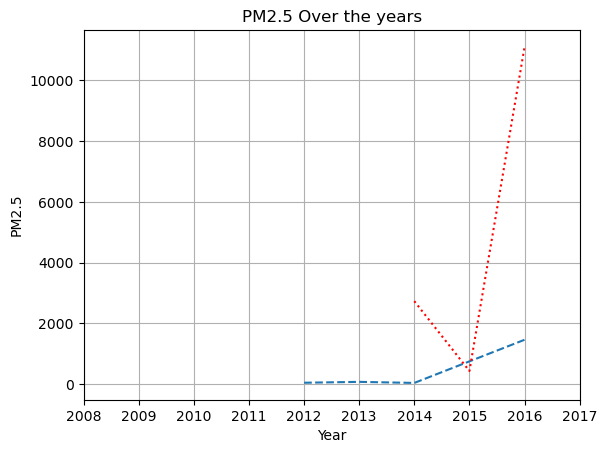

In [6]:
plt.plot(iran_series.index,iran_series.values,label='Iran',linestyle='dashed')
plt.plot(china_series.index,china_series.values,label='China',linestyle='dotted',color='red')
plt.xlabel('Year')
plt.ylabel('PM2.5')
plt.title('PM2.5 Over the years')
plt.xticks(df['Year'].value_counts().index)
plt.grid()
plt.show()

### **`Problem-2:`** Draw a histogram of the  column "PM10" of which the y-axis represents the probability (see the documentation how to draw the probability). 

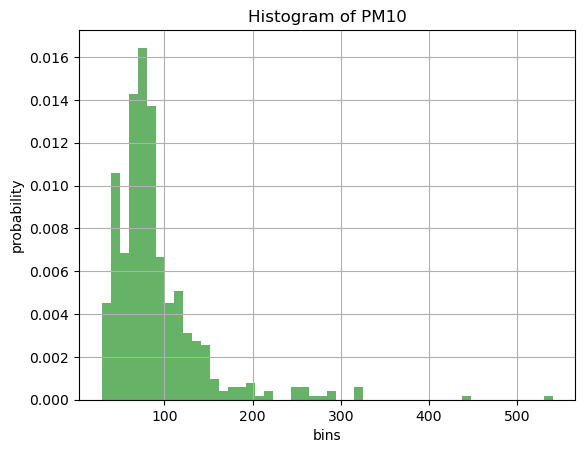

In [7]:
plt.hist(df['PM10'],density=True,bins=50,facecolor='green',alpha=0.6)
plt.xlabel('bins')
plt.ylabel('probability')
plt.title('Histogram of PM10')
plt.grid()
plt.show()

### **`Problem-3:`** Draw a scatter plot where x-axis represents "PM2.5" and y-axis represents "PM10" for two countries Poland and Chile.

In [8]:
poland_df=df.query("Country=='Poland'")
chile_df=df.query("Country=='Chile'")

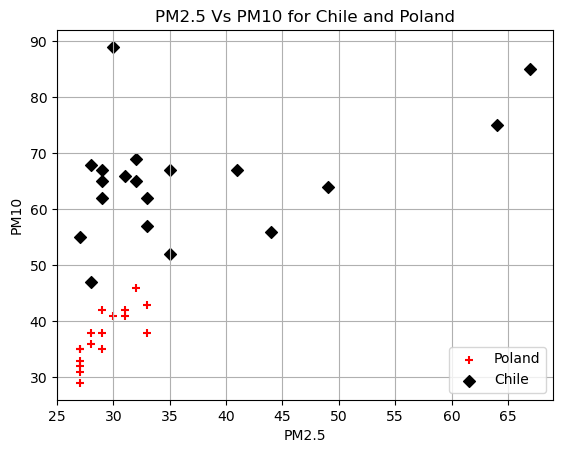

In [9]:
plt.scatter(poland_df['PM2.5'],poland_df['PM10'],marker='+',color='red',label='Poland')
plt.scatter(chile_df['PM2.5'],chile_df['PM10'],marker='D',color='black',label='Chile')
plt.xlabel('PM2.5')
plt.ylabel('PM10')
plt.title('PM2.5 Vs PM10 for Chile and Poland')
plt.legend()
plt.grid()
plt.show()

### **`Problem-4:`** Draw a pie chart of top 5 most frequent countries.

In [10]:
freq_ser =df['Country'].value_counts().head()

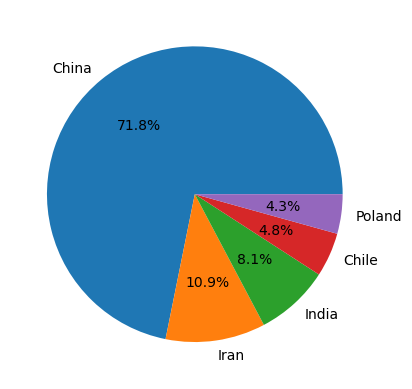

In [11]:
plt.pie(freq_ser,labels=freq_ser.index,autopct='%0.1f%%')
plt.show()